<a href="https://colab.research.google.com/github/khrnnisak/PCVK_Genap_2023/blob/master/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [46]:
def binary(img, thresh):
  img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # If the pixel value is greater than the threshold, set it to 255 (white), else set it to 0 (black)
        if img[i,j] > thresh:
            img[i,j] = 255
        else:
            img[i,j] = 0
  return img

def binary_inv(img, thresh):
  img = img.copy()
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if img[i,j] < thresh:
            img[i,j] = 255
          else:
              img[i,j] = 0
  return img

def truncate(img, thresh):
  img = img.copy()
  w,h,d = img.shape
  for i in range(w):
    for j in range(h):
      for k in range(d):
        if img[i,j,k] > thresh:
          img[i,j,k] = thresh
  return img

def tozero(img, thresh):
  img = img.copy()
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if img[i,j] < thresh:
            img[i,j] = 0
  return img

def tozero_inv(img, thresh):
  img = img.copy()
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if img[i,j] > thresh:
            img[i,j] = 0
  return img


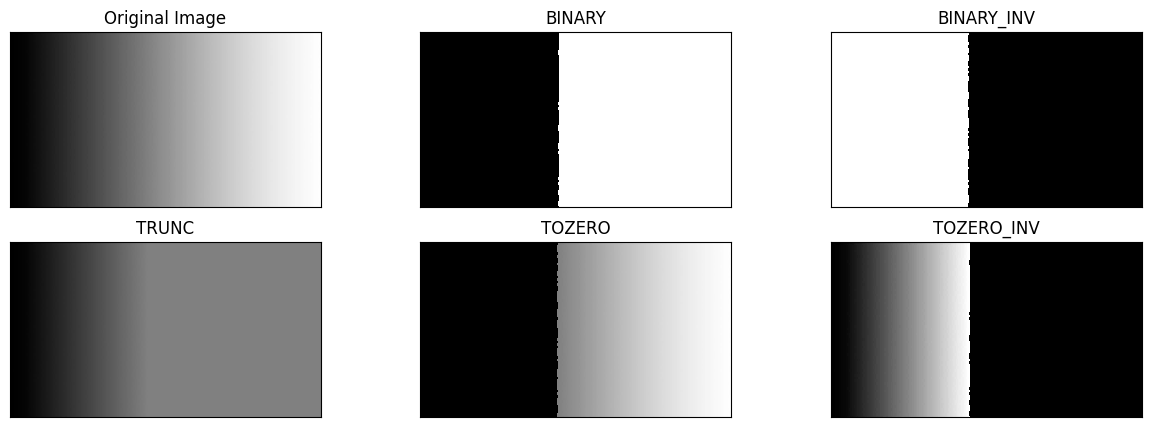

In [47]:
img = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg',0)
img3 = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg')
thresh = 128
t_binary = binary(img,thresh)
t_binary_inv = binary_inv(img,thresh)
t_truncate = truncate(img3,thresh)
t_tozero = tozero(img,thresh)
t_tozero_inv = tozero_inv(img,thresh)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, t_binary, t_binary_inv, t_truncate, t_tozero, t_tozero_inv] 
plt.figure(figsize = (15,5)) 
for i in range(len(images)): 
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
    plt.title(titles[i]) 
    plt.xticks([]),plt.yticks([]) 
plt.show()


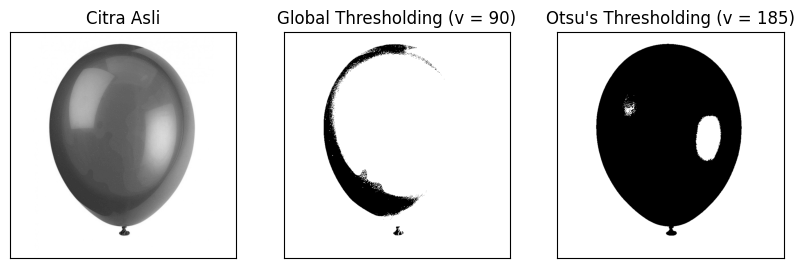

In [48]:

# Load image
image = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg')
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Calculate histogram
hist, bins = np.histogram(img, 256, [0, 256])

# Calculate probabilities of each intensity level
probabilities = hist / np.sum(hist)

# Calculate cumulative sum of probabilities
cum_sum = np.cumsum(probabilities)

# Calculate cumulative mean of intensity values
cum_mean = np.cumsum(probabilities * np.arange(256))

# Calculate global mean intensity value
global_mean = cum_mean[-1]

# Initialize variables for maximum variance and threshold value
max_variance = 0
threshold_value = 0

# Loop through all possible threshold values
for i in range(256):
    
    # Calculate class probabilities and means for foreground and background pixels
    class1_prob = cum_sum[i]
    class2_prob = 1 - class1_prob
    class1_mean = cum_mean[i] / class1_prob if class1_prob > 0 else 0
    class2_mean = (global_mean - cum_mean[i]) / class2_prob if class2_prob > 0 else 0
    
    # Calculate between-class variance
    between_class_variance = class1_prob * class2_prob * ((class1_mean - class2_mean) ** 2)
    # Update maximum variance and threshold value if current variance is greater than maximum variance
    if between_class_variance > max_variance:
        max_variance = between_class_variance
        threshold_value = i

# Threshold image using Otsu threshold value
thresholded_img = np.zeros_like(img)
thresholded_img[img > threshold_value] = 255

# Display images and threshold value
# Display results
global_treshold = 90
titles = ['Citra Asli', 'Global Thresholding (v = {})'.format(global_treshold), "Otsu's Thresholding (v = {})".format(threshold_value)]
images = [cv.cvtColor(image, cv.COLOR_BGR2GRAY), img > global_treshold, thresholded_img]
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


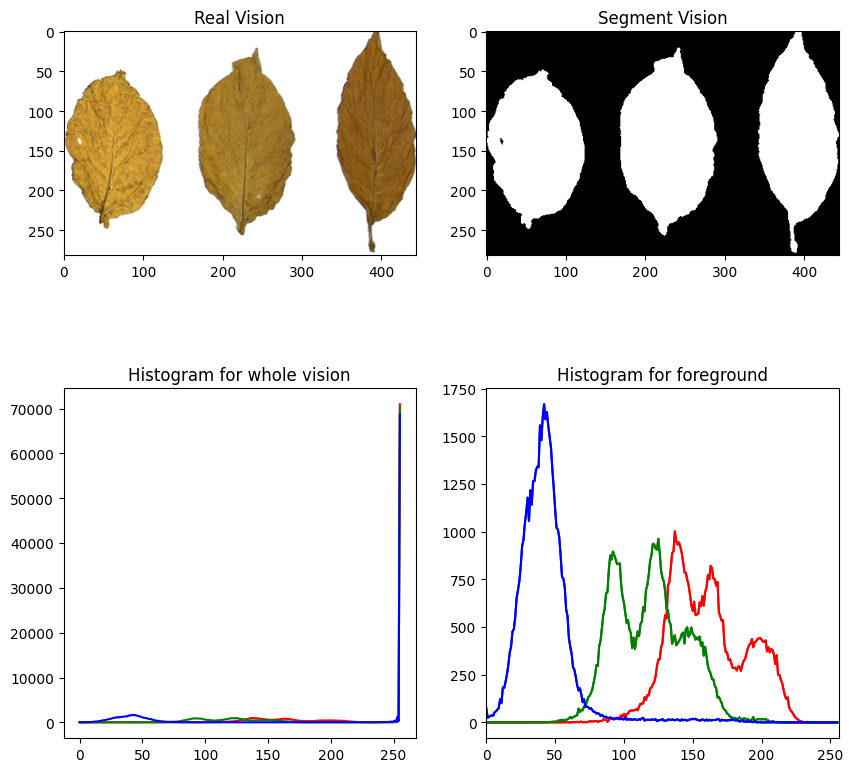

In [49]:

img = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Real Vision')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segment Vision')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for foreground')
    plt.xlim([0,256])

plt.show()

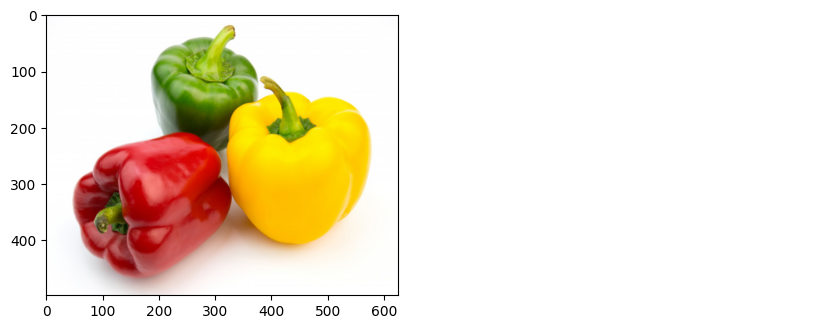

In [58]:

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg')

# Convert the image to the HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define lower and upper ranges for yellow color in HSV color space
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Threshold the image to get only yellow color
mask = cv.inRange(hsv_img, lower_yellow, upper_yellow)

# Apply the mask to the original image to get only the yellow pixels
yellow_img = cv.bitwise_and(img, img, mask=mask)

# Reshape the yellow image into a 2D array of pixels
h, w, _ = yellow_img.shape
pixels = yellow_img.reshape((h * w, 3))

# Perform K-Means clustering with k=3 (for yellow, green, and red colors)
k = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(pixels.astype(np.float32), k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Replace non-yellow centroids with yellow color
centers[1:] = [lower_yellow] * 2

# Assign each pixel to its corresponding cluster center
segmented = centers[labels.flatten()].reshape((h, w, 3))

# Display the original image and the segmented image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(segmented, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
